## IMDB_classifiter
本节使用IMDB 数据集，它包含来自互联网电影数据库（IMDB）的50 000 条严重两极分
化的评论。数据集被分为用于训练的25 000 条评论与用于测试的25 000 条评论，训练集和测试
集都包含50% 的正面评论和50% 的负面评论。

###   加载IMDB 数据集

In [44]:
from keras.datasets import imdb

In [45]:
# 参数num_words=10000 的意思是仅保留训练数据中前10 000 个最常出现的单词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [46]:
len(train_data)

25000

In [47]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [48]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
word_index = imdb.get_word_index()

In [50]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

###  准备数据
你不能将整数序列直接输入神经网络。你需要将列表转换为张量。转换方法有以下两种。
1.填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices)
的整数张量，然后网络第一层使用能处理这种整数张量的层（即Embedding 层)

2.对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列[3, 5]将会
被转换为10 000 维向量，只有索引为3 和5 的元素是1，其余元素都是0。然后网络第
一层可以用Dense 层，它能够处理浮点数向量数据。

将整数序列编码为二进制矩阵：

In [51]:
import numpy as np
def vectorize_seqences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))   # 创建一个形状为(len(sequence),dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.   # 将results[i]的指定索引设为1
    return results
x_train = vectorize_seqences(train_data) # 将训练数据向量化
x_test = vectorize_seqences(test_data)  # 将测试数据向量化

In [52]:
x_train.shape

(25000, 10000)

In [53]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

#### 构建网络
输入数据是向量，而标签是标量（1 和0），这是你会遇到的最简单的情况。有一类网络在这种问题上表现很好，
就是带有relu 激活的全连接层（Dense）的简单堆叠，比如Dense(16, activation='relu')。

对于这种Dense 层的堆叠，你需要确定以下两个关键架构：

1.网络有多少层；

2.每层有多少个隐藏单元。

中间层使用relu 作为激活函数，最后一层使用sigmoid 激活以输出一个0~1 范围内的概率值（表示样本的目标值等于1 的可能性，即评论为正面的可能性）。relu（rectified linear unit，整流线性单元）函数将所有负值归零（见图3-4），而sigmoid 函数则将任意值“压缩”到[0,1] 区间内（见图3-5），其输出值可以看作概率值。

In [55]:
# 模型定义
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

最后，你需要选择损失函数和优化器。由于你面对的是一个二分类问题，网络输出是一个概率值（网络最后一层使用sigmoid 激活函数，仅包含一个单元），那么最好使用binary_crossentropy（二元交叉熵）损失。这并不是唯一可行的选择，比如你还可以使用mean_squared_error（均方误差）。但对于输出概率值的模型，交叉熵（crossentropy）往往是最好的选择。交叉熵是来自于信息论领域的概念，用于衡量概率分布之间的距离，在这个例子中就是真实分布与预测值之间的距离。

下面的步骤是用rmsprop 优化器和binary_crossentropy 损失函数来配置模型。注意，我们还在训练过程中监控精度。

In [56]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

上述代码将优化器、损失函数和指标作为字符串传入，这是因为rmsprop、binary_crossentropy 和accuracy 都是Keras 内置的一部分。有时你可能希望配置自定义优化器的参数，或者传入自定义的损失函数或指标函数。前者可通过向optimizer 参数传入一个优化器类实例来实现，如下代码所示；后者可通过向loss 和metrics 参数传入函数对象来实现，

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer = optimizers.RMSprop(lr=0.001),loss = losses.binary_crossentropy,metrics = [metrics.binary_accuracy])

### 验证你的方法

#### 留出验证集

In [57]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

现在使用512 个样本组成的小批量，将模型训练20 个轮次（即对x_train 和y_train 两个张量中的所有样本进行20 次迭代）。与此同时，你还要监控在留出的10 000 个样本上的损失和精度。你可以通过将验证数据传入validation_data 参数来完成。

In [58]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 243us/step - loss: 0.5084 - acc: 0.7811 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.3004 - acc: 0.9044 - val_loss: 0.3002 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3086 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2842 - val_acc: 0.8835
Epoch 5/20
15000/15000 [==============================] - 2s 167us/step - loss: 0.1428 - acc: 0.9543 - val_loss: 0.2842 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.1151 - acc: 0.9652 - val_loss: 0.3148 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.0980 - acc: 0.9706 - val_loss: 0.3127 - 

在CPU 上运行，每轮的时间不到2 秒，训练过程将在20 秒内结束。每轮结束时会有短暂的停顿，因为模型要计算在验证集的10 000 个样本上的损失和精度。

注意，调用model.fit() 返回了一个History 对象。这个对象有一个成员history，它是一个字典，包含训练过程中的所有数据。我们来看一下。

In [59]:
history_dict = history.history

In [60]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

字典中包含4 个条目，对应训练过程和验证过程中监控的指标。在下面两个代码清单中，我们将使用Matplotlib 在同一张图上绘制训练损失和验证损失（见图3-7），以及训练精度和验证精度（见图3-8）。请注意，由于网络的随机初始化不同，你得到的结果可能会略有不同。

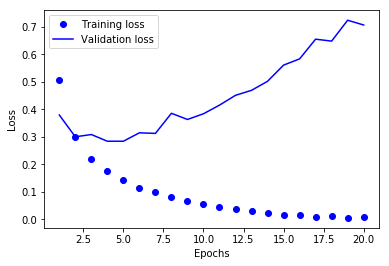

In [61]:
#  绘制训练损失和验证损失
import matplotlib.pyplot as plt
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
epochs = range(1,len(loss_value)+1)
plt.plot(epochs,loss_value,'bo',label = 'Training loss')
plt.plot(epochs,val_loss_value,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

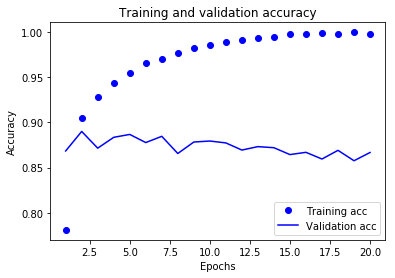

In [62]:
#  绘制训练精度和验证精度
plt.clf()  # 清空图像
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 从头开始重新训练一个模型
看上去，模型表现并不好，严重过拟合了

In [63]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 168us/step - loss: 0.4739 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.2674 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.2034 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 4s 151us/step


In [64]:
results

[0.31109148266792297, 0.87584]

这种相当简单的方法得到了88% 的精度。利用最先进的方法，你应该能够得到接近95% 的精度。

### 使用训练好的网络在新数据上生成预测结果

In [65]:
model.predict(x_test)

array([[0.16058204],
       [0.99984133],
       [0.39745444],
       ...,
       [0.08163828],
       [0.04936645],
       [0.45726934]], dtype=float32)

如你所见，网络对某些样本的结果非常确信（大于等于0.99，或小于等于0.01），但对其他结果却不那么确信（0.6 或0.4）

### 小结
下面是你应该从这个例子中学到的要点。
 通常需要对原始数据进行大量预处理，以便将其转换为张量输入到神经网络中。单词序列可以编码为二进制向量，但也有其他编码方式。

 带有 relu 激活的 Dense 层堆叠，可以解决很多种问题（包括情感分类），你可能会经常用到这种模型。

 对于二分类问题（两个输出类别），网络的最后一层应该是只有一个单元并使用sigmoid激活的Dense 层，网络输出应该是0~1 范围内的标量，表示概率    值。

 对于二分类问题的 sigmoid标量输出，你应该使用binary_crossentropy损失函数。

 无论你的问题是什么，rmsprop优化器通常都是足够好的选择。这一点你无须担心。

 随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，并在前所未见的数据上得到越来越差的结果。一定要一直监控模型在训练集之外的数据上的性能。